# Proyek Analisis Data:
- **Nama:** Eko Prabowo
- **Email:** 1prabowoku@gmail.com
- **ID Dicoding:** koekoo

## Menentukan Pertanyaan Bisnis

- Bagaiman performa jumlah penyewaan sepeda pada setiap bulannya dari tahun 2010 hingga 2011?
- Kapan jumlah penyewa sepeda yang paling banyak dan paling sedikit?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv('data\day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv('data\hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Dari dataframe diatas menunjukan bahwa data **hour_df** sebenarnya sudah mewakili keseluruan dari data **day_df** dikarenaka **hour_df** adalah penjabaran ke satuan jam dari data **day_df** yang menggunakan satuan hari. Oleh sebab itu untuk analisis ini penggunaan data **hour_df** sudah cukup.

### Assessing Data

Menilai Data hour_df

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dari pengamatan diatas, permasalah dari data tersebut terdapat ketidak sesuaian tipe data pada kolom **dteday** yang seharunya **datetime**.

### Cleaning Data

Mengubah tipe data pada kolom dteday menjadi datetime

In [7]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore ...

In [8]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [9]:
per_month = hour_df.dteday.dt.to_period("M")
hour_df.groupby(per_month).agg({
    "cnt": ["sum"]
})

,cnt
,sum
dteday,
2011-01,38189
2011-02,48215
2011-03,64045
2011-04,94870
2011-05,135821
2011-06,143512
2011-07,141341
2011-08,136691


In [10]:
hour_df["workingday"] = hour_df.workingday.apply(lambda x: "Workingday" if x == 1 else "Holiday" if x == 0 else x)
hour_df.groupby(by=["workingday", "hr"]).agg({
    "cnt": ["mean"]
})

cnt
                     mean
workingday hr            
Holiday    0    90.800000
           1    69.508696
           2    53.171053
           3    25.775330
           4     8.264317
           5     8.689189
           6    18.742358
           7    43.406926
           8   105.653680
           9   171.623377
           10  255.909091
           11  315.316017
           12  366.259740
           13  372.731602
           14  364.645022
           15  358.813853
           16  352.727273
           17  323.549784
           18  281.056522
           19  231.673913
           20  174.739130
           21  142.060870
           22  116.060870
           23   85.930435
Workingday 0    36.786290
           1    16.552632
           2     8.683778
           3     4.942553
           4     5.429787
           5    24.913131
           6   102.500000
           7   290.612903
           8   477.006048
           9   241.518145
           10  135.366935
           11  158.229839
           12  200.820926
           13  198.429719
           14  183.572289
           15  201.331325
           16  293.122244
           17  525.290581
           18  492.226908
           19  348.401606
           20  249.718876
           21  186.287149
           22  138.389558
           23   88.708835

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaiman performa jumlah penyewaan sepeda pada setiap bulannya dari tahun 2010 hingga 2011?

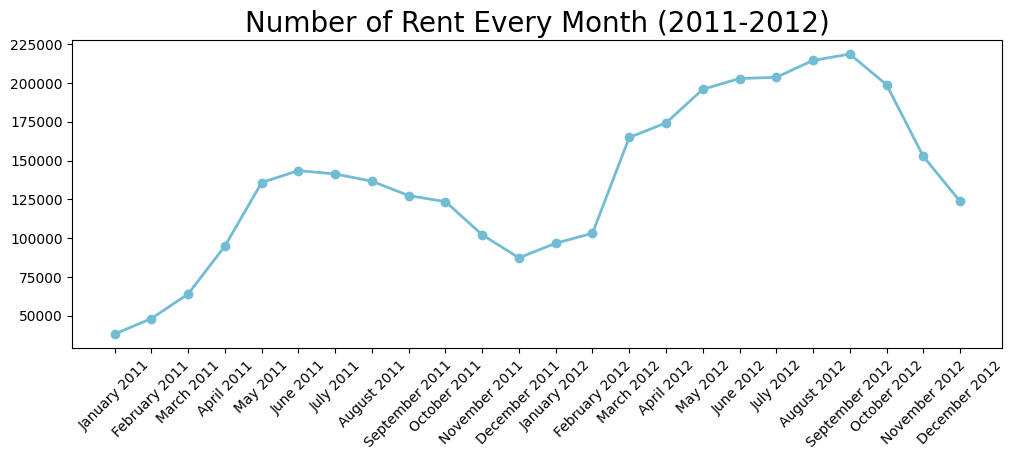

In [ ]:
monthly_rent_df = hour_df.resample(rule='M', on='dteday').agg({
    "cnt": "sum"
})
monthly_rent_df.index = monthly_rent_df.index.strftime('%B %Y')

monthly_rent_df = monthly_rent_df.reset_index()
monthly_rent_df.rename(columns={
    "dteday": "bulan",
    "cnt": "total_penyewa"
}, inplace=True)

plt.figure(figsize=(12, 4))
plt.plot(
    monthly_rent_df["bulan"],
    monthly_rent_df["total_penyewa"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Number of Rent Every Month (2011-2012)", loc="center", fontsize=20)
plt.xticks(fontsize=10,rotation=45)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 2: Kapan jumlah penyewa sepeda yang paling banyak dan paling sedikit?

In [12]:
sum_hour_workingday_df = hour_df[hour_df['workingday']=='Workingday'].groupby(["hr"]).cnt.mean().sort_values(ascending=False).reset_index()
sum_hour_workingday_df['hr'] = list(map(lambda x: f'{x}:00', sum_hour_workingday_df.hr))
sum_hour_workingday_df.head(15)

,hr,cnt
0,17:00,525.290581
1,18:00,492.226908
2,8:00,477.006048
3,19:00,348.401606
4,16:00,293.122244
5,7:00,290.612903
6,20:00,249.718876
7,9:00,241.518145
8,15:00,201.331325
9,12:00,200.820926


In [13]:
sum_hour_holiday_df = hour_df[hour_df['workingday']=='Holiday'].groupby(["hr"]).cnt.mean().sort_values(ascending=False).reset_index()
sum_hour_holiday_df['hr'] = list(map(lambda x: f'{x}:00', sum_hour_holiday_df.hr))
sum_hour_holiday_df.head(15)

,hr,cnt
0,13:00,372.731602
1,12:00,366.259740
2,14:00,364.645022
3,15:00,358.813853
4,16:00,352.727273
5,17:00,323.549784
6,11:00,315.316017
7,18:00,281.056522
8,10:00,255.909091
9,19:00,231.673913


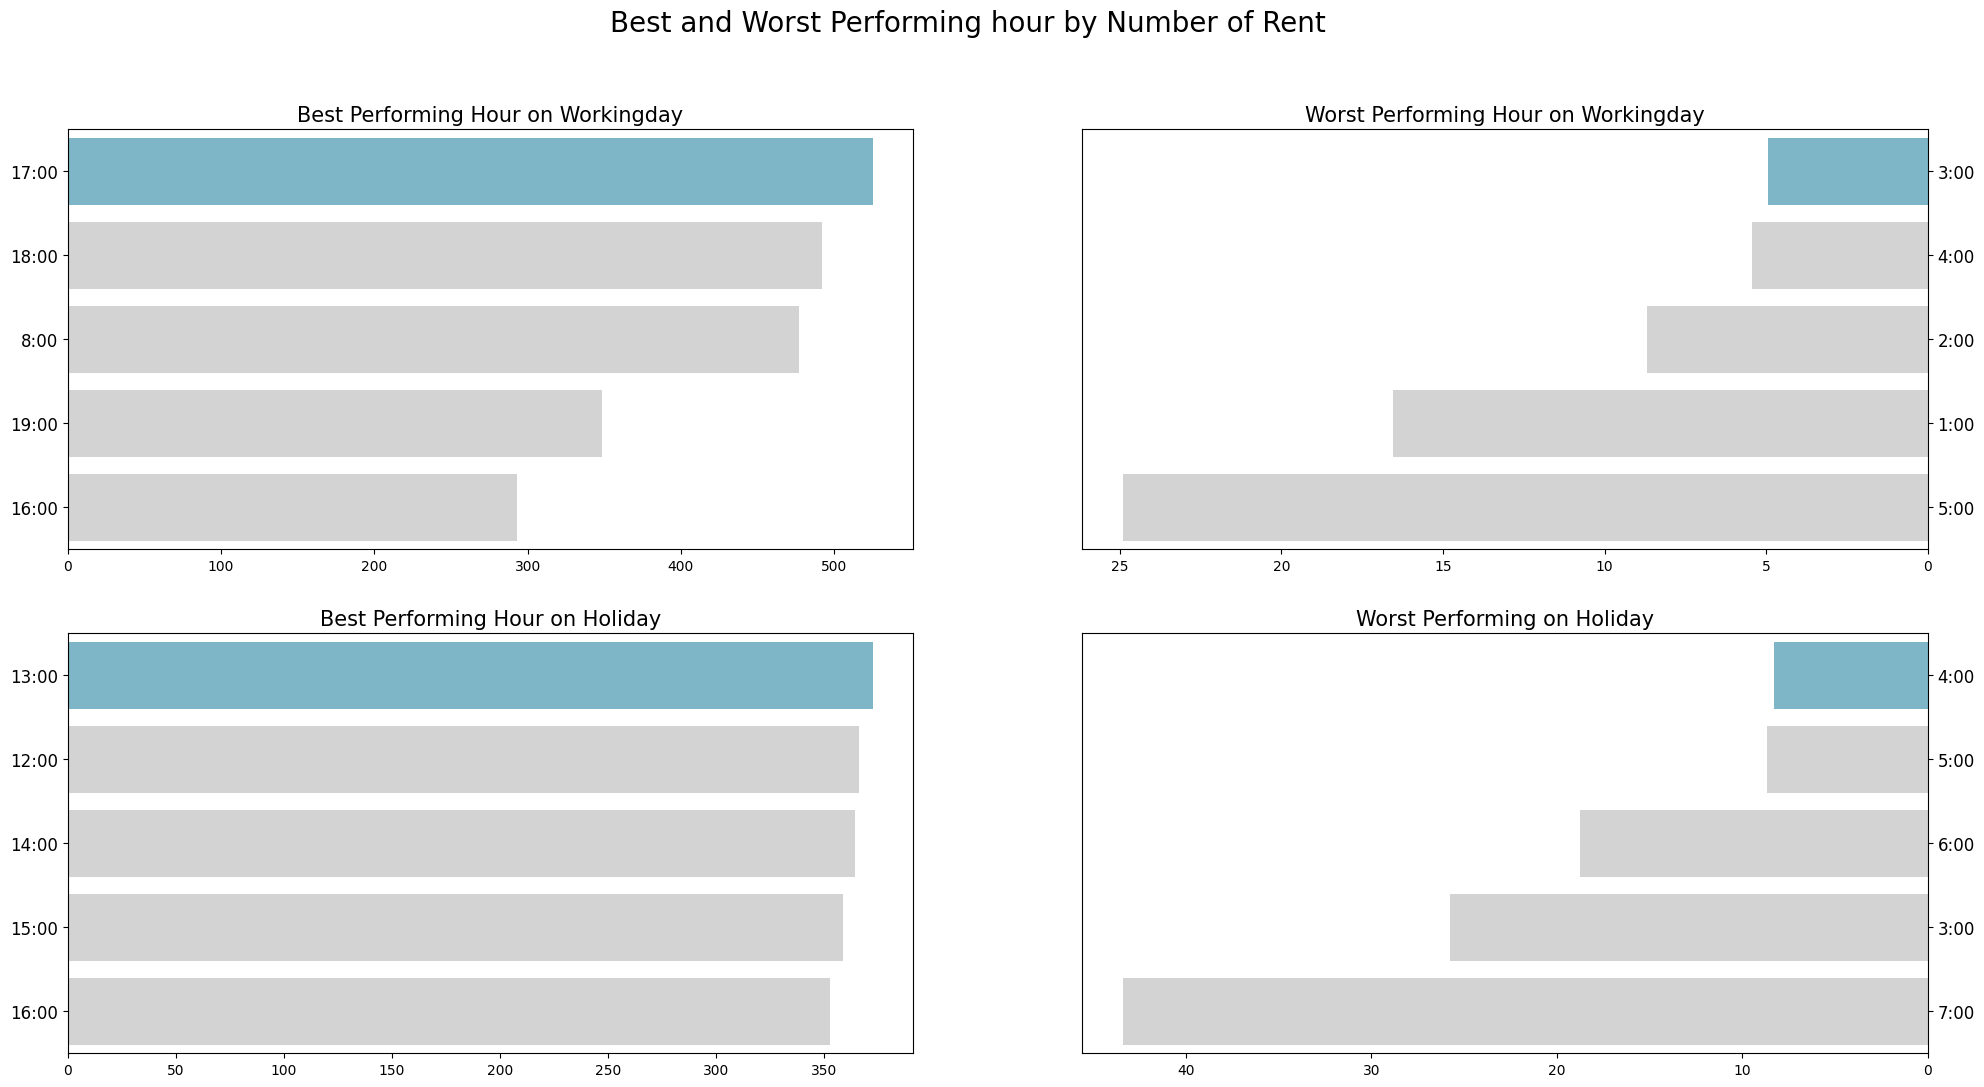

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(24, 12))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="cnt", y="hr", data=sum_hour_workingday_df.head(5), palette=colors, ax=ax[0][0])
ax[0][0].set_ylabel(None)
ax[0][0].set_xlabel(None)
ax[0][0].set_title("Best Performing Hour on Workingday", loc="center", fontsize=15)
ax[0][0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="cnt", y="hr", data=sum_hour_workingday_df.sort_values(by="cnt", ascending=True).head(5), palette=colors, ax=ax[0][1])
ax[0][1].set_ylabel(None)
ax[0][1].set_xlabel(None)
ax[0][1].invert_xaxis()
ax[0][1].yaxis.set_label_position("right")
ax[0][1].yaxis.tick_right()
ax[0][1].set_title("Worst Performing Hour on Workingday", loc="center", fontsize=15)
ax[0][1].tick_params(axis='y', labelsize=12)

sns.barplot(x="cnt", y="hr", data=sum_hour_holiday_df.head(5), palette=colors, ax=ax[1][0])
ax[1][0].set_ylabel(None)
ax[1][0].set_xlabel(None)
ax[1][0].set_title("Best Performing Hour on Holiday", loc="center", fontsize=15)
ax[1][0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="cnt", y="hr", data=sum_hour_holiday_df.sort_values(by="cnt", ascending=True).head(5), palette=colors, ax=ax[1][1])
ax[1][1].set_ylabel(None)
ax[1][1].set_xlabel(None)
ax[1][1].invert_xaxis()
ax[1][1].yaxis.set_label_position("right")
ax[1][1].yaxis.tick_right()
ax[1][1].set_title("Worst Performing on Holiday", loc="center", fontsize=15)
ax[1][1].tick_params(axis='y', labelsize=12)


plt.suptitle("Best and Worst Performing hour by Number of Rent", fontsize=20)
plt.show()

In [15]:
sum_hour_workingday_df['hr'][0]

'17:00'

## Conclusion

Kesimpulan dari Analisis yaitu:

### **Kesimpulan Pertanyaan 1:**
- Secara keseluruhan, jumlah penyewa sepeda **naik** dari 2011 ke 2012, dengan lonjakan terbesar di Februari 2012, yaitu sekitar **70% lebih tinggi** dibanding Januari 2011.
- Di kuartal 4 setiap tahun, jumlah penyewa sepeda selalu **menurun**.
- Bulan dengan jumlah penyewa **terbanyak** adalah **September 2012**.

### **Kesimpulan Pertanyaan 2:**
- Permintaan sewa sepeda **tertinggi** di hari kerja terjadi di **sore hari**, sedangkan di hari libur mencapai puncaknya di **siang hari**.
- Permintaan sewa paling **rendah** terjadi di jam **3:00-5:00 pagi** baik di hari kerja maupun hari libur, karena mobilitas di jam tersebut sangat **rendah**.